In [12]:
# importing image object from PIL
import math
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np


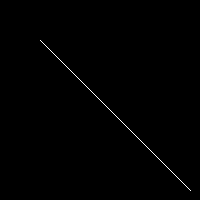

In [13]:
w, h = 200, 200
shape = [(40, 40), (w - 10, h - 10)]

# creating new Image object
img = Image.new("RGB", (w, h))

# create line image
img1 = ImageDraw.Draw(img)
img1.line(shape, fill ="white", width = 0)
display(img)

In [14]:
x0 = 540
y0 = 980
x1 = 240
y1 = 380

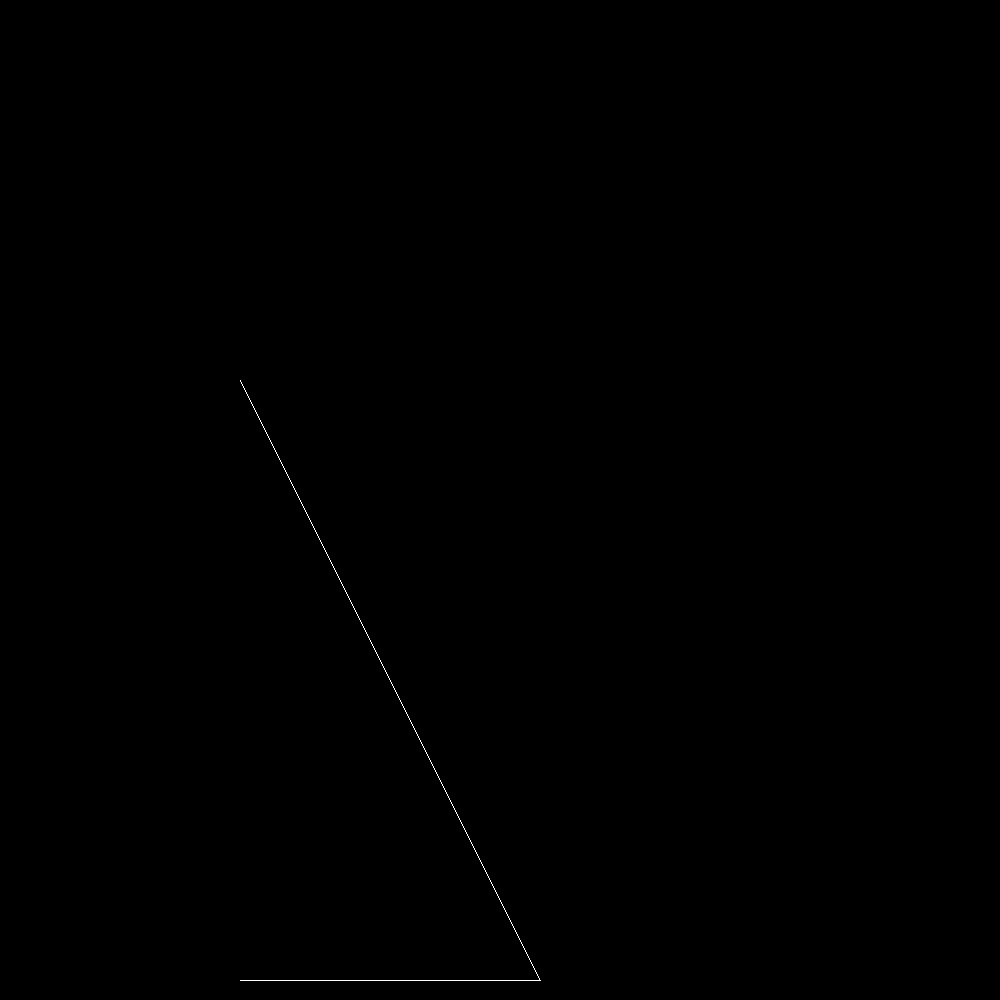

In [15]:
w, h = 1000, 1000
# creating new Image object
img = Image.new("RGB", (w, h))

# create line image
img1 = ImageDraw.Draw(img)
img1.line([(x0, y0), (x1, y1)], fill ="white", width = 0)
img1.line([(x1, y0), (x0, y0)], fill ="white", width = 0)
display(img)

In [16]:
base_folder = "flat_maps_data"
labels = pd.read_csv(base_folder + "/labels.csv", names = ["path", "N"])
print(labels.iloc[0:10,:])

                                path    N
0  spatial_kin/spatial_sim_5.0_0.csv  292
1  spatial_kin/spatial_sim_5.0_1.csv  212
2  spatial_kin/spatial_sim_5.0_2.csv  234
3  spatial_kin/spatial_sim_5.0_3.csv  235
4  spatial_kin/spatial_sim_5.0_4.csv  277
5  spatial_kin/spatial_sim_5.0_5.csv  224
6  spatial_kin/spatial_sim_5.0_6.csv  227
7  spatial_kin/spatial_sim_5.0_7.csv  243
8  spatial_kin/spatial_sim_5.0_8.csv  241
9  spatial_kin/spatial_sim_5.0_9.csv  269


In [22]:
path = labels["path"].iloc[500]
print(path)
kin = pd.read_csv(base_folder + "/" + path, header = 0)
print(np.max(parents[" x0"]))
print(np.max(parents[" x1"]))
print(np.max(parents[" y0"]))
print(np.max(parents[" y1"]))

spatial_kin/spatial_sim_6.25_0.csv
9.048007225752864
9.048007225752864
9.490721856242212
9.490721856242212


In [24]:
sib_rows = kin.loc[(kin["# half-sibs"]==1) | (kin[" sibs"]==1)]
print(sib_rows)

     # half-sibs   sibs   age0   age1        x0        y0        x1        y1
372          1.0    0.0    2.0   15.0  3.258800  3.282990  4.044571  2.276801
392          1.0    0.0    2.0    1.0  6.517779  5.149963  6.445997  5.172987


In [27]:
print(len(sib_rows))

2


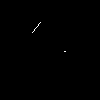

In [33]:
w, h = 100, 100
# creating new Image object
img = Image.new("RGB", (w, h))

# create line image
img1 = ImageDraw.Draw(img)
for i in range(len(sib_rows)):
    row = sib_rows.iloc[i]
    x0 = row[" x0"]*10
    x1 = row[" x1"]*10
    y0 = row[" y0"]*10
    y1 = row[" y1"]*10
    img1.line([(x0, y0), (x1, y1)], fill ="white", width = 0)
display(img)

In [11]:
np.unique(img)

array([  0, 255], dtype=uint8)

In [37]:
def spaghetti_plot(kin_rows):
    w, h = 100, 100
    # creating new Image object
    img = Image.new("RGB", (w, h))

    # create line image
    img1 = ImageDraw.Draw(img)
    for i in range(len(sib_rows)):
        row = kin_rows.iloc[i]
        x0 = row[" x0"]*10
        x1 = row[" x1"]*10
        y0 = row[" y0"]*10
        y1 = row[" y1"]*10
        img1.line([(x0, y0), (x1, y1)], fill ="white", width = 0)
    return(img)

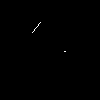

In [38]:
new_img = spaghetti_plot(sib_rows)
display(new_img)